In [ ]:
# renderizar 

In [3]:
from num2words import num2words

def numero_a_texto(numero):
    # Separar la parte entera de la parte decimal
    parte_entera, parte_decimal = str(numero).split(',')
    
    # Convertir la parte entera a texto
    texto_parte_entera = num2words(int(parte_entera.replace('.', '')), lang='es')
    
    # Convertir la parte decimal a texto
    texto_parte_decimal = f"{int(parte_decimal):02d}/100"
    
    # Formatear el resultado
    resultado = f"{texto_parte_entera} {texto_parte_decimal}"
    
    # Capitalizar la primera letra
    resultado = resultado.capitalize()
    
    return resultado

# Ejemplo de uso
numero = "252352,56"
texto = numero_a_texto(numero)
print(texto)


Doscientos cincuenta y dos mil trescientos cincuenta y dos 56/100


In [35]:
import pandas as pd
from docxtpl import DocxTemplate
import os

# Cargar el archivo Excel
file_path = 'temp/excel.xlsx'
sheet_name = 'Tabla1'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Crear una lista de diccionarios para usar con docxtpl
table_data = df.to_dict('records')

# Cargar la plantilla de Word
template_path = 'templates/dynamic_table_tpl.docx'
doc = DocxTemplate(template_path)

# Contexto para la plantilla
context = {
    #'col_labels' : df.columns.to_list(),
    'tabla': df.to_dict('tight')
}

print(context)


{'tabla': {'index': [0, 1, 2, 3], 'columns': ['No', 'Partida', 'ID', 'DESCRIPCIÓN ', 'UNIDAD', 'CANTIDAD', 'PRECIO UNIT EN BS.', 'TOTAL BS.'], 'data': [[1, 39700, ' LOOP 21: 11084', 'CONECTOR ESTANDAR', 'pcs', 42, 157.92, 6632.639999999999], [2, 39700, 11419340, 'CARGADOR CTEK MXS 5,0 14,4 VDCC', 'pcs', 8, 4898.09, 39184.72], [3, 39700, ' LOOP 21: 11083', 'CARRETE DE CABLE ', 'pcs', 3, 7654.95, 22964.85], [4, 39700, 's/c', 'CONVERTIDOR AC/DC', 'pcs', 3, 2382.13, 7146.39]], 'index_names': [None], 'column_names': [None]}}


In [ ]:
# Renderizar la plantilla
doc.render(context)

# Guardar el documento resultante
output_docx = 'temp/rendered_table.docx'
doc.save(output_docx)

print(f"El documento se ha guardado en: {output_docx}")




['Hoja1', 'Tabla1', 'Tabla2', 'Tabla3']


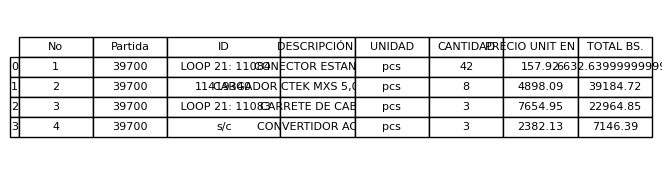

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Crear un DataFrame de ejemplo
file_path = 'temp/excel.xlsx'
sheet_name = 'Tabla1'

# List the sheet names in the provided Excel file
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
print(sheet_names)


# Read the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Renombrar el índice a "Item"
df.index.name = 'Item'

# Configurar la figura y el tamaño en función del contenido
fig, ax = plt.subplots(figsize=(8, 2))  # Ajusta el tamaño de la figura según sea necesario
ax.axis('tight')
ax.axis('off')

# Dibujar la tabla
tabla = table(ax, df, loc='center', cellLoc='center', colWidths=[0.1]*len(df.columns))

# Ajustar el ancho de las columnas
tabla.auto_set_font_size(False)
#tabla.auto_set_column_width(True)
tabla.auto_set_column_width(2)
tabla.set_fontsize(8)
tabla.scale(1.2, 1.2)  # Ajusta la escala para que se ajuste al contenido

# Guardar la imagen
plt.savefig('dataframe_image.png', bbox_inches='tight', pad_inches=0.1)

# Mostrar la imagen (opcional)
plt.show()


In [6]:
import pandas as pd
from docxtpl import DocxTemplate
from docx.shared import Pt

# Load the Excel file
file_path = 'temp/excel.xlsx'
sheet_name = 'Tabla1'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Convert the DataFrame to a list of dictionaries
table_data = df.to_dict(orient='records')
columns = df.columns.tolist()

# Prepare the context for docxtpl
context = {
    'table_data': table_data,
    'columns': columns
}

# Load the Word template
template_path = 'temp/template.docx'
doc = DocxTemplate(template_path)

# Add the table to the document
def render_table(doc, context):
    table = doc.add_table(rows=1, cols=len(context['columns']))
    hdr_cells = table.rows[0].cells
    for i, col in enumerate(context['columns']):
        hdr_cells[i].text = col

    for item in context['table_data']:
        row_cells = table.add_row().cells
        for i, col in enumerate(context['columns']):
            row_cells[i].text = str(item[col])
            row_cells[i].paragraphs[0].runs[0].font.size = Pt(10)

    # table.style = 'Table Grid'

# Clear the content of the template and render the table
doc.render(context)
for para in doc.paragraphs:
    if '{{ table_data }}' in para.text:
        p = para._element
        p.getparent().remove(p)

render_table(doc, context)

# Save the document
output_path = 'output/output.docx'
doc.save(output_path)

output_path


KeyError: 'columns'

<table>
    <thead>
        <th> No </th>
        <th> Partida </th>
        <th> ID </th>
        <th> DESCRIPCION  </th>
        <th> UNIDAD  </th>
        <th> CANTIDAD  </th>
        <th> P.U.  </th>
        <th> TOTAL BS  </th>
    </thead>
    <tbody>
        <tr>
            <td>   1 </td>
            <td>   39700 </td>
            <td>    LOOP 21: 11084 </td>
            <td>   CONECTOR ESTANDAR </td>
            <td>   Pza </td>
            <td>   42</td>
            <td>   157.92</td>
            <td>   6632.64</td>
        </tr>
    </tbody>

</table>